# Estimate power-law creep envelopes

Copyright 2020 Marco A. Lopez-Sanchez.  
Content under [Creative Commons Attribution license CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/), code under [Mozilla Public License 2.0](https://www.mozilla.org/en-US/MPL/2.0/).

> **Goal**: Understand flow laws and estimate power-law creep envelopes for different rock types.

## Introduction

Below depths of about 10-15 km, the temperature is high enough to favour creep processes, a phenomenon by which the material is permanently deformed under constant stress without losing coherence, over those of friction. To describe and predict how rocks deform under such conditions, we need a mathematical rule that relates stress (or force) to strain or strain rate. We called such relation a **flow law**, _deformation law_, or a *constitutive equation*. The adjective _constitutive_ means that this relation depends on the constitution of the material. Many polycrystalline solid materials, such as rocks, glaciers or metals show that at temperatures above half the melting temperature $>0.5T_m$ the strain rate $\dot{\epsilon}$ is proportional to the differential stress raised to some power of n ($\dot{\epsilon} \propto \sigma^n_d$) as long as the shear stress is above a threshold value called the [yield stress](https://en.wikipedia.org/wiki/Yield_(engineering)). Below that limit, however, an elastic (recoverable) deformation occurs. This behaviour is generally referred to as [plasticity](https://en.wikipedia.org/wiki/Plasticity_(physics)) or plastic deformation. The two most important features of plastic deformation is that **once the yield stress is exceeded**, the final deformation depends mainly on time and temperature (which strongly affects strain rates). It is therefore said that plasticity is a process with a strong dependence on time and temperature.

## Step 1: The power-law creep approximation

At low to moderate stresses (<200 MPa), those expected to operate in the ductile lithosphere, the relationship between differential stress and strain rate for most of the rocks in the laboratory fits a relationship referred to as the _power-law creep_ of the form

$$
\dot{\epsilon} = \sigma^n_d A \space exp \left( \frac{E}{RT} \right)
$$
  
$$
\sigma_d = \dot{\epsilon}^{(1/n)} \left( \frac{1}{A} \right)^{1/n} \space exp \left( \frac{E}{nRT} \right)
$$

where $\sigma_d$ is the differential stress in _MPa_ and $n$ the power-law exponent, $\dot{\epsilon}$ is the strain rate in $s^{-1}$ wich considers the _time dependence_ of the deformation, and $A \space exp(E/RT)$ is the Arrhenius equation (see box below for details) that considers the _temperature dependence_ of the deformation, the higher the temperature the higher the strain rate for a similar differential stress.

> The [Arrhenius equation](https://en.wikipedia.org/wiki/Arrhenius_equation) is a formula proposed by [Svante Arrhenius](https://en.wikipedia.org/wiki/Svante_Arrhenius) to model reaction rates, i.e. the frequency of events per second that result in a reaction. This equation, however, is used in a general way for any process involving rates and a dependence on temperature such as for example viscosity in fluids or plasticity in solids. In our case, it will account for the frequency of events that lead to a permanent crystal lattice deformation. The equation consists of two main parts, the _pre-exponential factor_ $(A)$ which in a chemical reaction accounts for the number of events per second leading to or not to a reaction (or a permanent crystal lattice deformation), and the _exponential factor_ $[exp(E/RT)]$ that accounts for the probability that any given event will result in a reaction (or a permanent crystal lattice deformation). The _exponential factor_ includes the _activation energy_ $(E)$ required for the reaction or any other process to be modelled in $J mol^{-1}$, the _universal gas constant_ $(R)$ in $J mol^{-1} K^{-1}$, and the _absolute temperature_ $(T)$ in kelvins. The _pre-exponential factor_ $(A)$ and the _activation energy_ $(E)$ are both material-specific variables and are estimated in the laboratory for different types of rock.

At moderate differential stresses (20-200 MPa) and temperatures above half the melting temperature $>0.5T_m$, most rock types in the laboratory usually provide values of $n$ between 3 and 5. At these conditions, rock samples typically develop dynamic recrystallization and crystallographic preferred orientation (CPO), both typical features of a deformation controlled by the movement of dislocations known as [dislocation creep](https://en.wikipedia.org/wiki/Dislocation_creep). This observation is in excellent agreement with what is observed in nature, where the most typical feature in natural ductile shear zones below 10-15 km is the presence of fine-grained rocks known as [mylonites](https://en.wikipedia.org/wiki/Mylonite) characterized by these very same microstructures. Hence, geophysicists usually use power-law equations with $n$ values typical of the dislocation creep to model the deformation of the non-frictional part of the lithosphere, a fairly reliable first approximation since most of the deformation in the lithosphere is accommodated through [crustal-scale shear zones](https://doi.org/10.1016/j.tecto.2012.06.006).


### The effect of pressure, grain size, and water fugacity

TODO 


we finally obtain a power-law relation like this

$$
\dot{\epsilon} = \sigma^n_d \space d^{-m} \space f_{H_2O}^r \space A \space exp \left( \frac{E + PV}{RT} \right)
$$

where $d$ is the average grain size in μm and $m$ the grain size exponent, and $f_{H_2O}$ and $r$ are the water fugacity (water molecules per 1e6 Si atoms) and the water fugacity exponent, respectively. Note that if $m$ and $r$ equals zero, the effect of grain size and/or water fugacity is ignored.

In [3]:
def power_law_creep(srate, A, n, exp_fact, gsize=(1, 0), water=(1,0)):
    """ Return the neccesary differential stress (Tresca criterion) in
    MPa for permanently deforming a polycrystalline material at a given
    environmental conditions.

    Parameters (scalars and tuples, all positive values)
    ----------
    srate : strain rate [s**-1]
    n : stress exponent
    A : material constant [MPa**-n s**-1]
    exp_fact : tuple of dim 4 (E, T, P, V)
        E : activation energy [J mol**-1]
        T : absolute temperature [K]
        P : pressure [MPa]
        V : activation volume per mol [m**3 mol**-1]
    gsize : optional, tuple of dim 2 (d, m); (1, 0) by default
        d : average grain size [microns]
        m : grain size exponent [in absolute value]
    water : optional, tuple of dim 2 (f, r); (1, 0) by default
        f : fugacity of water [water molecules per 1e6 Si atoms]
        r : water fugacity exponent

    Assumptions
    -----------
    - Steady-state creep
    - Low to moderate stress regime (< 200 MPa)
    - Effect of partial melt ignored
    """
    # set universal gas constant [J mol**-1 K**-1]
    R = 8.3144626 
    
    # extract parameters
    E, T, P, V = exp_fact
    d, m = gsize
    f, r = water

    return (srate * (d**-m) * (f**r) * np.exp((E + P * V) / (R * T)) / A)**(1 / n)

## Step 2: Estimate and plot a power-law creep envelope for the crust

In [4]:
# import the required Python scientific libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# set a custom figure style (optional, you can comment on this whole block)
import matplotlib as mpl
mpl.style.use('fivethirtyeight')
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['axes.edgecolor'] = 'white'

First, load some Python functions that are stored in the folder scripts. These will be used later to build the power-law creep envelopes.

In [5]:
# flow_laws_params.py contains the experimental estimates of the different
# parameters of the power-law creep equation
%run scripts/flow_laws_params.py

# thermal_functions contains the functions required to estimate a stable geotherm.
# see the "stable geotherm" notebook for details.
%run scripts/thermal_functions.py

functions loaded from 'flow_laws_params.py': 
 quartz,
 olivine, 
 olivine_Idrissi 

funtions loaded from 'thermal_functions.py': 
 turcotte_schubert_model 
 thermal_conductivity


Set some parameters of the model

In [6]:
moho = 38.8 # Continental crust thickness [m], average from Hacker et al. (2015)
T0 = 7.5  # surface T (taken from the KTB superdeep borehole)
ro_crust = 2750  # average rock density in the crust [kg/m**3]
g = 9.80665      # average gravitational acceleration [m/s**2]

# Average heat parameters for the crust
Jq_crust = 65  # Average heat flux [mW m**-2] from Jaupar and Mareschal (2007)
A_crust = 0.97  # Average rate of radiogenic heat production [microW m**-3] from Huang et al. (2013)
K_crust = 2.51  # Coefficient of thermal conductivity [W m**-1 K**-1] from Sclater et al. (1980)

Now, let's create an array with the depths and estimate the corresponding temperatures (a.k.a the geotherm) using the Turcote and Schubert model

In [7]:
# generate a linear spaced array of depths every 10 m
depths = np.linspace(start=0, stop=moho, num=3880)

# call the "turcotte_schubert_model" and pass the different arguments in order
T_crust = turcotte_schubert_model(depths, thermal=(T0, Jq_crust, A_crust, K_crust))

# create a pandas dataframe (tabular-like data)
dataset = pd.DataFrame({'depths_km': depths,
                        'Tmodel1_C': T_crust})
dataset

,depths_km,Tmodel1_C
0,0.000000,7.500000
1,0.010003,7.759012
2,0.020005,8.017984
3,0.030008,8.276919
4,0.040010,8.535814
...,...,...
3875,38.759990,720.952582
3876,38.769992,721.061766
3877,38.779995,721.170910
3878,38.789997,721.280016


In [8]:
# estimate the pressure gradient (assuming constant density)
dataset['pressure_MPa'] = (ro_crust * g * dataset['depths_km']) / 1e3  # /1e3 to obtain MPa
dataset

,depths_km,Tmodel1_C,pressure_MPa
0,0.000000,7.500000,0.000000
1,0.010003,7.759012,0.269752
2,0.020005,8.017984,0.539505
3,0.030008,8.276919,0.809257
4,0.040010,8.535814,1.079010
...,...,...,...
3875,38.759990,720.952582,1045.290545
3876,38.769992,721.061766,1045.560298
3877,38.779995,721.170910,1045.830050
3878,38.789997,721.280016,1046.099803


Let see which flow laws are available

In [9]:
quartz()

Available flow laws:
'HTD' from Hirth et al. (2004)
'LP_wet' from Luan and Paterson (1992)
'GT_wet' from Gleason and Tullis (1995)
'HK_wet' from Holyoke and Kronenberg (2010)
'RB_wet' from Rutter and Brodie (2004)


In this example, we are going to use the Hirth et al. (2004) and the Gleason and Tullis (1995) flow laws to compare.

In [10]:
n1, E1, A1 = quartz('HTD')
n2, E2, A2 = quartz('GT_wet')

estimate the differential stress at steady-state using 1.0e-14 $s^{-1}$ as the reference average shear strain rate in the ductile lithosphere.

In [11]:
dataset['model_HTD'] = power_law_creep(srate=1e-14, A=A1, n=n1,
                                       exp_fact=(E1,
                                                 dataset['Tmodel1_C'] + 273.15,  # convert C to K
                                                 dataset['pressure_MPa'], 1)
                                      )

dataset['model_GT'] = power_law_creep(srate=1e-14, A=A2, n=n2,
                                       exp_fact=(E2,
                                                 dataset['Tmodel1_C'] + 273.15,
                                                 dataset['pressure_MPa'], 1)
                                      )

dataset

,depths_km,Tmodel1_C,pressure_MPa,model_HTD,model_GT
0,0.000000,7.500000,0.000000,381447.543528,7.339248e+07
1,0.010003,7.759012,0.269752,376405.168573,7.179545e+07
2,0.020005,8.017984,0.539505,371439.292966,7.023625e+07
3,0.030008,8.276919,0.809257,366548.617149,6.871392e+07
4,0.040010,8.535814,1.079010,361731.865885,6.722751e+07
...,...,...,...,...,...
3875,38.759990,720.952582,1045.290545,12.220068,2.708210e+00
3876,38.769992,721.061766,1045.560298,12.214647,2.706217e+00
3877,38.779995,721.170910,1045.830050,12.209231,2.704227e+00
3878,38.789997,721.280016,1046.099803,12.203821,2.702240e+00


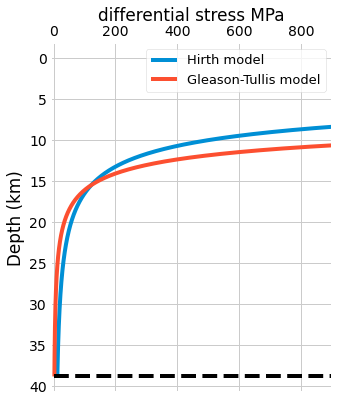

In [13]:
# plot the geotherm for the entire lithosphere
fig1, ax = plt.subplots(figsize=(4.5, 6))

# tweak the figure so that the depth is shown on the y-axis downwards
plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the strength envelopes
ax.plot(dataset['model_HTD'], dataset['depths_km'], label='Hirth model')
ax.plot(dataset['model_GT'], dataset['depths_km'], label='Gleason-Tullis model')
ax.plot([0, 1100], [moho, moho], color='black', linestyle='dashed')
ax.set(xlabel='differential stress MPa', ylabel='Depth (km)')

ax.set_xlim(left=-10, right=900)
ax.legend(loc='best', fontsize=13)